In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [16]:
'''def cost_function(X, y, theta):   
    m = y.size
    h = X.dot(theta)
    J = (1 / (2 * m)) * np.sum(np.square(h - y))
    error = h - y
    return J, error
def gradient_descent(X, y, theta, alpha, iters):
    m = y.size
    cost_array = np.zeros(iters)
    for i in range(iters):
        cost, error = cost_function(X, y, theta)
        theta = theta - (alpha / m) * X.T.dot(error)
        cost_array[i] = cost
    return theta, cost_array'''

'def cost_function(X, y, theta):   \n    m = y.size\n    h = X.dot(theta)\n    J = (1 / (2 * m)) * np.sum(np.square(h - y))\n    error = h - y\n    return J, error\ndef gradient_descent(X, y, theta, alpha, iters):\n    m = y.size\n    cost_array = np.zeros(iters)\n    for i in range(iters):\n        cost, error = cost_function(X, y, theta)\n        theta = theta - (alpha / m) * X.T.dot(error)\n        cost_array[i] = cost\n    return theta, cost_array'

In [6]:
#__main__
df=pd.read_csv('BostonHousing.csv')
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [9]:
data1=df.drop(['zn','chas','rm','rad'],axis=1)
data1

,crim,indus,nox,age,dis,tax,ptratio,b,lstat,medv
0,0.00632,2.31,0.538,65.2,4.0900,296,15.3,396.90,4.98,24.0
1,0.02731,7.07,0.469,78.9,4.9671,242,17.8,396.90,9.14,21.6
2,0.02729,7.07,0.469,61.1,4.9671,242,17.8,392.83,4.03,34.7
3,0.03237,2.18,0.458,45.8,6.0622,222,18.7,394.63,2.94,33.4
4,0.06905,2.18,0.458,54.2,6.0622,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...
501,0.06263,11.93,0.573,69.1,2.4786,273,21.0,391.99,9.67,22.4
502,0.04527,11.93,0.573,76.7,2.2875,273,21.0,396.90,9.08,20.6
503,0.06076,11.93,0.573,91.0,2.1675,273,21.0,396.90,5.64,23.9
504,0.10959,11.93,0.573,89.3,2.3889,273,21.0,393.45,6.48,22.0


In [13]:
Y=df['medv']

In [14]:
Y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: medv, Length: 506, dtype: float64

In [22]:

X = data1.drop("medv", axis=1)  
y = data1["medv"]  # Target variable
X = np.c_[np.ones(len(X)), X]

weights = np.zeros(X.shape[1])

learning_rate = 0.01
iterations = 1000

for epoch in range(iterations):
    predictions = np.dot(X, weights)
    errors = predictions - y
    weights -= learning_rate * np.dot(X.T, errors)


print("Final weights:", weights)

final_predictions = np.dot(X, weights)

mse = np.mean((final_predictions - y) ** 2)
print("Mean squared error:", mse)

Final weights: [nan nan nan nan nan nan nan nan nan nan]
Mean squared error: nan


C:\Users\CSLab\AppData\Local\Temp\ipykernel_1016\2534098985.py:13: RuntimeWarning: invalid value encountered in subtract
  weights -= learning_rate * np.dot(X.T, errors)


Final theta: [[3.7937865 ]
 [3.23665823]
 [5.22708209]]


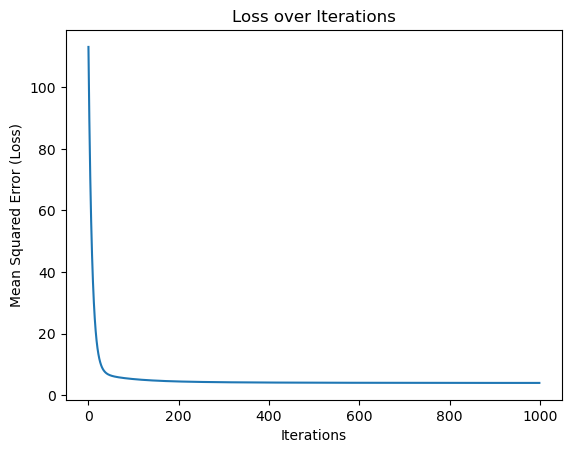

In [21]:
np.random.seed(42)
X = 2 * np.random.rand(100, 2)
noise = np.random.randn(100, 1)
y = 4 + 3 * X[:, 0] + 5 * X[:, 1] + 2 * noise.flatten()

X_b = np.c_[np.ones((100, 1)), X]

theta = np.random.randn(3, 1)
learning_rate = 0.01
n_iterations = 1000
loss_history = []

for iteration in range(n_iterations):
    gradients = 2/100 * X_b.T.dot(X_b.dot(theta) - y.reshape(-1, 1))
    theta = theta - learning_rate * gradients
    loss = np.mean((X_b.dot(theta).flatten() - y)**2)
    loss_history.append(loss)


print("Final theta:", theta)

plt.plot(loss_history)
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error (Loss)')
plt.title('Loss over Iterations')
plt.show()